In [1]:
from tracking import Tracks
import cv2
from utils.metrics import bbox_iou
from utils.plots import draw_boxes
import numpy as np
import torch

/Users/maochenhui/miniforge3/envs/DL/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [2]:
with open("./runs/detect/exp/labels/labels.txt", "r") as fo:
    contents = fo.readlines()
fo.close()
contents = [content.strip().split() for content in contents]
contents

[['9', '0', '0.36', '0', '8', '18', '180'],
 ['58', '0', '0.35', '4', '20', '45', '381'],
 ['59', '0', '0.33', '3', '18', '46', '385'],
 ['60', '0', '0.33', '1', '21', '50', '385'],
 ['61', '0', '0.39', '0', '26', '64', '404'],
 ['62', '0', '0.46', '3', '29', '67', '402'],
 ['63', '0', '0.49', '6', '29', '71', '404'],
 ['64', '0', '0.55', '3', '3', '81', '416'],
 ['65', '0', '0.59', '3', '4', '81', '416'],
 ['66', '0', '0.51', '13', '15', '81', '416'],
 ['67', '0', '0.55', '13', '17', '87', '416'],
 ['68', '0', '0.59', '13', '18', '85', '416'],
 ['69', '0', '0.63', '12', '6', '95', '416'],
 ['70', '0', '0.56', '13', '19', '97', '416'],
 ['71', '0', '0.43', '16', '4', '108', '416'],
 ['72', '0', '0.33', '21', '0', '115', '416'],
 ['73', '0', '0.35', '31', '6', '117', '416'],
 ['74', '0', '0.33', '33', '17', '128', '416'],
 ['75', '0', '0.53', '37', '23', '133', '416'],
 ['76', '0', '0.64', '36', '55', '146', '412'],
 ['77', '0', '0.65', '36', '60', '150', '408'],
 ['78', '0', '0.64', '5

In [3]:
bboxes_dict = {}
conf_dict = {}

for i, content in enumerate(contents):
    boxes = []
    confs = []
    for i in range(len(content)//7):
        tmp = content[i*7:(i+1)*7]
        frame_id = int(tmp[0])
        boxes.append([int(b) for b in tmp[3:]])
        confs.append(float(tmp[2]))
    boxes = torch.tensor(boxes)
    bboxes_dict[frame_id] = boxes
    conf_dict[frame_id] = confs

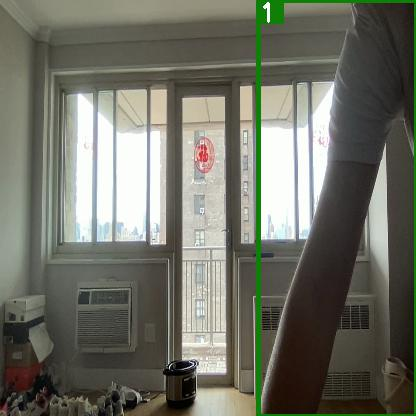

error: OpenCV(4.5.4) /private/var/folders/b7/g6qfbypj0tq32j5_trjh516r0000gn/T/pip-req-build-f8yjfelj/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [5]:
from IPython.core.display import display
from utils.inference_utils import show_array
import IPython
import time

source = "./runs/detect/exp/FALL_DEMO.mp4"
v_cap = cv2.VideoCapture(source)  # initialize the video capture
frame_count = 0
tracks = Tracks(min_conf=0.5)
imgsz = (416, 416)

try:
    while True:
        success, frame = v_cap.read()  # read frame from video
        frame = cv2.resize(frame, imgsz)
        if not success:
            print("1 Detect Finished")
            break
        if frame_count in bboxes_dict and frame_count in conf_dict:
            tracks.update(bboxes_dict[frame_count], conf_dict[frame_count])
            bbox_xyxy = []
            identities = []
            for track in tracks.tracks:
                if track.current:
                    bbox_xyxy.append(track.bbox)
                    identities.append(track.idx)
            draw_boxes(frame, bbox_xyxy, identities)
        frame_count+=1
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        IPython.display.clear_output(wait=True)  # clear the previous frame
        show_array(frame)
        time.sleep(0.03)
        
except KeyboardInterrupt:
    v_cap.release()
    out.release()
    print("2 Detect Finish")

In [6]:
bboxes_dict

{9: tensor([[  0,   8,  18, 180]]),
 58: tensor([[  4,  20,  45, 381]]),
 59: tensor([[  3,  18,  46, 385]]),
 60: tensor([[  1,  21,  50, 385]]),
 61: tensor([[  0,  26,  64, 404]]),
 62: tensor([[  3,  29,  67, 402]]),
 63: tensor([[  6,  29,  71, 404]]),
 64: tensor([[  3,   3,  81, 416]]),
 65: tensor([[  3,   4,  81, 416]]),
 66: tensor([[ 13,  15,  81, 416]]),
 67: tensor([[ 13,  17,  87, 416]]),
 68: tensor([[ 13,  18,  85, 416]]),
 69: tensor([[ 12,   6,  95, 416]]),
 70: tensor([[ 13,  19,  97, 416]]),
 71: tensor([[ 16,   4, 108, 416]]),
 72: tensor([[ 21,   0, 115, 416]]),
 73: tensor([[ 31,   6, 117, 416]]),
 74: tensor([[ 33,  17, 128, 416]]),
 75: tensor([[ 37,  23, 133, 416]]),
 76: tensor([[ 36,  55, 146, 412]]),
 77: tensor([[ 36,  60, 150, 408]]),
 78: tensor([[ 57,  36, 155, 416]]),
 79: tensor([[ 68,  39, 154, 416]]),
 80: tensor([[ 73,  43, 156, 416]]),
 81: tensor([[ 20,  59, 124, 409],
         [ 69,  42, 156, 416]]),
 82: tensor([[  6,  49, 135, 416],
         [

In [5]:
tracks.tracks[0].bbox

tensor([258,   0, 416, 416])

In [6]:
tracks = Tracks()

for i, content in enumerate(contents):
    print(f"Current iteration {i}")
    boxes = []
    confs = []
    for i in range(len(content)//7):
        tmp = content[i*7:(i+1)*7]
        boxes.append([int(b) for b in tmp[3:]])
        confs.append(float(tmp[2]))
    boxes = torch.tensor(boxes)
    tracks.update(boxes, confs)
    for track in tracks.tracks:
        print(track)

Current iteration 0
0 tensor([  0,   8,  18, 180])
Current iteration 1
0 tensor([  0,   8,  18, 180])
1 tensor([  4,  20,  45, 381])
Current iteration 2
0 tensor([  0,   8,  18, 180])
1 tensor([  3,  18,  46, 385])
Current iteration 3
0 tensor([  0,   8,  18, 180])
1 tensor([  1,  21,  50, 385])
Current iteration 4
0 tensor([  0,   8,  18, 180])
1 tensor([  0,  26,  64, 404])
Current iteration 5
0 tensor([  0,   8,  18, 180])
1 tensor([  3,  29,  67, 402])
Current iteration 6
0 tensor([  0,   8,  18, 180])
1 tensor([  6,  29,  71, 404])
Current iteration 7
0 tensor([  0,   8,  18, 180])
1 tensor([  3,   3,  81, 416])
Current iteration 8
0 tensor([  0,   8,  18, 180])
1 tensor([  3,   4,  81, 416])
Current iteration 9
0 tensor([  0,   8,  18, 180])
1 tensor([ 13,  15,  81, 416])
Current iteration 10
0 tensor([  0,   8,  18, 180])
1 tensor([ 13,  17,  87, 416])
Current iteration 11
0 tensor([  0,   8,  18, 180])
1 tensor([ 13,  18,  85, 416])
Current iteration 12
0 tensor([  0,   8,  18,